# Проект e-commerce

In [229]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Описание переменных таблицы customers:

*customer_id* — позаказный идентификатор пользователя  
*customer_unique_id* —  уникальный идентификатор пользователя  (аналог номера паспорта)  
*customer_zip_code_prefix* —  почтовый индекс пользователя  
*customer_city* —  город доставки пользователя  
*customer_state* —  штат доставки пользователя

In [230]:
customers = pd.read_csv('olist_customers_dataset.csv')
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [231]:
print('Таблица customers содержит {} строк и {} столбцов'.format(customers.shape[0], customers.shape[1]))
print('Описание столбцов:\n', customers.dtypes)

Таблица customers содержит 99441 строк и 5 столбцов
Описание столбцов:
 customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object


### Описание переменной таблицы orders:

*order_id* —  уникальный идентификатор заказа (номер чека)  
*customer_id* —  позаказный идентификатор пользователя  
*order_status* —  статус заказа  
*order_purchase_timestamp* —  время создания заказа  
*order_approved_at* —  время подтверждения оплаты заказа  
*order_delivered_carrier_date* —  время передачи заказа в логистическую службу  
*order_delivered_customer_date* —  время доставки заказа  
*order_estimated_delivery_date* —  обещанная дата доставки 

### Cтатусы заказов:

*created* —  создан    
*approved* —  подтверждён  
*invoiced* —  выставлен счёт  
*processing* —  в процессе сборки заказа  
*shipped* —  отгружен со склада  
*delivered* —  доставлен пользователю  
*unavailable* —  недоступен  
*canceled* —  отменён  

In [232]:
orders = pd.read_csv('olist_orders_dataset.csv', parse_dates= ['order_purchase_timestamp', \
                     'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date',
                     'order_estimated_delivery_date'])
print('Таблица orders содержит {} строк и {} столбцов'.format(orders.shape[0], orders.shape[1]))
print('Описание столбцов:\n', orders.dtypes)


Таблица orders содержит 99441 строк и 8 столбцов
Описание столбцов:
 order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object


### Описание переменной таблицы order_items:

*order_id* —  уникальный идентификатор заказа (номер чека)  
*order_item_id* —  идентификатор товара внутри одного заказа  
*product_id* —  ид товара (аналог штрихкода)  
*seller_id* — ид производителя товара  
*shipping_limit_date* —  максимальная дата доставки продавцом для передачи заказа партнеру по логистике  
*price* —  цена за единицу товара  
*freight_value* —  вес товара

In [233]:
order_items = pd.read_csv('olist_order_items_dataset.csv', parse_dates = ['shipping_limit_date'])
order_items.dtypes
print('Таблица order_items содержит {} строк и {} столбцов'.format(order_items.shape[0], order_items.shape[1]))
print('Описание столбцов:\n', order_items.dtypes)

Таблица order_items содержит 112650 строк и 7 столбцов
Описание столбцов:
 order_id                       object
order_item_id                   int64
product_id                     object
seller_id                      object
shipping_limit_date    datetime64[ns]
price                         float64
freight_value                 float64
dtype: object


## 1. Сколько пользователей совершило покупку только один раз? 

Информация о пользователях содержится в таблице *customers*. Оттуда нас интересует столбец ***customer_unique_id***. Присоединим к таблице *orders* информацию о покупателях при помощи функции merge. Теперь каждой покупке соответствует пользователь ее совершивший.

In [234]:
orders_customers_unique_id = orders.merge(customers[['customer_id', 'customer_unique_id']], on = 'customer_id', how = 'inner')
orders_customers_unique_id

df = orders_customers_unique_id[['order_id', 'customer_id', 'customer_unique_id',  \
                                  'order_status', 'order_approved_at', 'order_purchase_timestamp']]
df

,order_id,customer_id,customer_unique_id,order_status,order_approved_at,order_purchase_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 11:07:15,2017-10-02 10:56:33
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,af07308b275d755c9edb36a90c618231,delivered,2018-07-26 03:24:27,2018-07-24 20:41:37
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,3a653a41f6f9fc3d2a113cf8398680e8,delivered,2018-08-08 08:55:23,2018-08-08 08:38:49
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,7c142cf63193a1473d2e66489a9ae977,delivered,2017-11-18 19:45:59,2017-11-18 19:28:06
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,72632f0f9dd73dfee390c9b22eb56dd6,delivered,2018-02-13 22:20:29,2018-02-13 21:18:39
...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,6359f309b166b0196dbf7ad2ac62bb5a,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,da62f9e57a76d978d02ab5362c509660,delivered,2018-02-06 13:10:37,2018-02-06 12:58:58
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,737520a9aad80b3fbbdad19b66b37b30,delivered,2017-08-27 15:04:16,2017-08-27 14:46:43
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,5097a5312c8b157bb7be58ae360ef43c,delivered,2018-01-08 21:36:21,2018-01-08 21:28:27


### Определим термин "покупка"

*Покупкой будем считать опллаченные заказы со статусом 'delivered'. Таким образом мы можем с уверенностью сказать, что заказ доставлен и оплачен, а вероятность отмены нулевая (возможен возврат, но такой вариант не предусмотрен в таблице). Данное определение покупки имеет свои недостатки в силу некоторой консервативности и неучета заказов находящихся в пути или на складе, но уже оплаченных. Однако в описанных выше случаях мы не можем гарантировать, что заказ не будет отменен. Более того, абсолютное большинство заказов(97 процентов) удовлетворяет введенному определению, что дает дополнительную уверенность в его корректности.*

In [235]:
df = df.query("order_status == 'delivered' and order_approved_at != 'NaT'")
df

,order_id,customer_id,customer_unique_id,order_status,order_approved_at,order_purchase_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 11:07:15,2017-10-02 10:56:33
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,af07308b275d755c9edb36a90c618231,delivered,2018-07-26 03:24:27,2018-07-24 20:41:37
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,3a653a41f6f9fc3d2a113cf8398680e8,delivered,2018-08-08 08:55:23,2018-08-08 08:38:49
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,7c142cf63193a1473d2e66489a9ae977,delivered,2017-11-18 19:45:59,2017-11-18 19:28:06
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,72632f0f9dd73dfee390c9b22eb56dd6,delivered,2018-02-13 22:20:29,2018-02-13 21:18:39
...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,6359f309b166b0196dbf7ad2ac62bb5a,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,da62f9e57a76d978d02ab5362c509660,delivered,2018-02-06 13:10:37,2018-02-06 12:58:58
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,737520a9aad80b3fbbdad19b66b37b30,delivered,2017-08-27 15:04:16,2017-08-27 14:46:43
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,5097a5312c8b157bb7be58ae360ef43c,delivered,2018-01-08 21:36:21,2018-01-08 21:28:27


### Таблица со всеми пользователями, совершивишими только один заказ:

In [236]:
df1 = df.groupby('customer_unique_id', as_index = False) \
        .agg({'order_id': 'count'}).query('order_id == 1').rename(columns = 
        {'order_id': 'count_of_purchases'})

df1

,customer_unique_id,count_of_purchases
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1
...,...,...
93340,fffcf5a5ff07b0908bd4e2dbc735a684,1
93341,fffea47cd6d3cc0a88bd621562a9d061,1
93342,ffff371b4d645b6ecea244b27531430a,1
93343,ffff5962728ec6157033ef9805bacc48,1


In [237]:
print('{} пользователей совершили только одну покупку'.format(df1.shape[0]))

90545 пользователей совершили только одну покупку


In [284]:
round(90545/93345 * 100, 2)

97.0

**90545 уникальных пользователей совершили покупку лишь один раз, что составляет 97% от числа покупателей**

## 2. Сколько заказов в месяц в среднем не доставляется по разным причинам?

Основных причин недоставки заказа две и они обе зависят от его статуса. Заказ может быть отменен (*canceled*) пользователем или недоступен для доставки (*unavailable*). Ниже приведена помесячная статистика недоставки заказов с **детализацией по причинам**.

In [239]:
df2 = orders.query("order_status == 'canceled' or order_status == 'unavailable'") \
      .groupby([pd.Grouper(key='order_purchase_timestamp', freq='M'), 'order_status']) \
      .agg({'order_id': 'count'}).reset_index().pivot(index = 'order_purchase_timestamp', \
      columns = 'order_status', values = 'order_id').reset_index().rename(columns = \
      {'order_purchase_timestamp': 'month'})
df2['month'] = df2['month'].dt.strftime('%Y-%m')
df2

order_status,month,canceled,unavailable
0,2016-09,2.0,NaN
1,2016-10,24.0,7.0
2,2017-01,3.0,10.0
3,2017-02,17.0,45.0
4,2017-03,33.0,32.0
5,2017-04,18.0,9.0
6,2017-05,29.0,31.0
7,2017-06,16.0,24.0
8,2017-07,28.0,52.0
9,2017-08,27.0,32.0


In [240]:
# print('По причине canceled в среднем ежемесячно не доставляется {} заказов\nПо причине unavailablе ежемесячно в среднем не доставлется {} заказов'\
#       .format(df2.canceled.mean().round(), df2.unavailable.mean().round()))


**По причине canceled в среднем ежемесячно не доставляется ≈ 26 заказов  
По причине unavailablе ежемесячно в среднем не доставлется ≈ 29 заказов**

### Также проверим,насколько отмена заказов связана с просрочкой shipping_limit_date

В таблице **order_items** содержится информация о содержимом заказов. Поскольку в одном заказе может быть несколько товаров, но есть как минимум один, для того, чтобы узнать сроки доставки для каждого из заказов, отфильтруем **order_items**, оставив только один продукт для каждого заказа. Таким образом, получаем дедлайн для *order_id*.

In [241]:
order_items_unique = order_items.query('order_item_id == 1')[['order_id', 'shipping_limit_date']]
order_items_unique

,order_id,shipping_limit_date
0,00010242fe8c5a6d1ba2dd792cb16214,2017-09-19 09:45:35
1,00018f77f2f0320c557190d7a144bdd3,2017-05-03 11:05:13
2,000229ec398224ef6ca0657da4fc703e,2018-01-18 14:48:30
3,00024acbcdf0a6daa1e931b038114c75,2018-08-15 10:10:18
4,00042b26cf59d7ce69dfabb4e55b4fd9,2017-02-13 13:57:51
...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,2018-05-02 04:11:01
112646,fffcd46ef2263f404302a634eb57f7eb,2018-07-20 04:31:48
112647,fffce4705a9662cd70adb13d4a31832d,2017-10-30 17:14:25
112648,fffe18544ffabc95dfada21779c9644f,2017-08-21 00:04:32


Поскольку в отфильтрованном **order_items** содержится меньше строк чем в таблице **orders**, делаем вывод, что в **order_items** нет информации о сравнительно малом количестве заказов (меньше чем тысяча). Используем *inner_join* для объединения таблиц.

In [242]:
orders_with_shipping_limit = orders.merge(order_items_unique, on='order_id', how='inner')
orders_with_shipping_limit.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017-10-06 11:07:15
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018-07-30 03:24:27
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018-08-13 08:55:23
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017-11-23 19:45:59
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018-02-19 20:31:37


**По таблице ниже видно, что лишь малая часть заказов была отменена предположительно по причине пренебрежения крайним сроком доставки. Более того два заказа были отменены после доставки в пункт выдачи.**

In [243]:
orders_with_shipping_limit.query("shipping_limit_date < order_delivered_carrier_date") \
                          .query("order_status == 'canceled'")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date
14675,5abf37ab57e23f69a9c8ab98c4800273,19a045432879d6ddb4fd5611a0e2ba5b,canceled,2018-01-28 00:25:15,2018-01-28 00:36:35,2018-02-01 20:07:57,NaT,2018-02-20,2018-02-01 00:36:35
53577,2c0032906c603dcc21cd954828fa77d0,4afea82f984caa99c5946b758f101abd,canceled,2018-02-06 13:44:50,2018-02-06 15:55:40,2018-02-16 20:35:24,NaT,2018-03-12,2018-02-12 15:55:40
57375,854f8cb8dacdc3abc4cce7a7df6fcc1f,58512a1043fd8047a4f96d5fa665fd2d,canceled,2018-02-02 09:09:27,2018-02-02 09:15:27,2018-02-08 22:06:59,NaT,2018-03-06,2018-02-08 09:15:27
58086,fe9fae71b4fa7d05f1934adc54391f8d,fa9db18cb6fd65d306a4d710799111a8,canceled,2018-02-15 15:28:12,2018-02-15 15:46:54,2018-02-21 19:59:14,NaT,2018-03-07,2018-02-21 14:46:54
58873,8beb59392e21af5eb9547ae1a9938d06,bf609b5741f71697f65ce3852c5d2623,canceled,2016-10-08 20:17:50,2016-10-09 14:34:30,2016-10-14 22:45:26,2016-10-19 18:47:43,2016-11-30,2016-10-13 14:34:31
74906,9ec3685b1f21c7dfff4f656392b186dd,952f534f87d6ec6eeaa2cfd1d5987362,canceled,2018-02-20 11:37:45,2018-02-20 11:50:31,2018-02-27 16:17:59,NaT,2018-03-12,2018-02-26 11:50:31
81909,4472eca3b65b1dca5e0d59c0e4e0c6bc,5775437e881f0a230649f5c63e1f9241,canceled,2018-02-10 07:39:19,2018-02-10 08:20:22,2018-02-15 22:22:46,NaT,2018-02-26,2018-02-15 08:20:22
91919,65d1e226dfaeb8cdc42f665422522d14,70fc57eeae292675927697fe03ad3ff5,canceled,2016-10-03 21:01:41,2016-10-04 10:18:57,2016-10-25 12:14:28,2016-11-08 10:58:34,2016-11-25,2016-10-21 16:24:43
92453,47e96b5cb6f0592d336b6bf8a817d1c3,9cce7727e7d1d1a738ccc755eae38e93,canceled,2018-01-21 12:44:16,2018-01-22 13:49:10,2018-02-01 00:08:56,NaT,2018-02-19,2018-01-26 13:49:10
95557,1def7af24cb7182497acfd953f6dd88b,b35c38c2cd6a72b58cb104154d9782e4,canceled,2017-12-21 09:22:36,2017-12-23 02:12:37,2018-01-30 19:28:55,NaT,2018-02-20,2018-01-29 02:12:37


**Однако несопаставимо больше людей с некоторой терпимостью отнеслись к задержке заказа и не стали отменять его из-за задержки**

In [244]:
orders_with_shipping_limit.query("shipping_limit_date < order_delivered_carrier_date") \
                          .query("order_status != 'canceled'")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date
20,203096f03d82e0dffbc41ebc2e2bcfb7,d2b091571da224a1b36412c18bc3bbfe,delivered,2017-09-18 14:31:30,2017-09-19 04:04:09,2017-10-06 17:50:03,2017-10-09 22:23:46,2017-09-28,2017-09-25 04:04:09
28,91b2a010e1e45e6ba3d133fa997597be,cce89a605105b148387c52e286ac8335,delivered,2018-05-02 11:45:38,2018-05-03 12:55:01,2018-05-10 16:16:00,2018-05-16 20:56:24,2018-05-23,2018-05-09 12:55:01
30,f70a0aff17df5a6cdd9a7196128bd354,456dc10730fbdba34615447ea195d643,delivered,2017-08-10 11:58:33,2017-08-12 02:45:24,2017-08-17 15:35:07,2017-08-18 14:28:02,2017-08-23,2017-08-17 02:45:24
41,6ea2f835b4556291ffdc53fa0b3b95e8,c7340080e394356141681bd4c9b8fe31,delivered,2017-11-24 21:27:48,2017-11-25 00:21:09,2017-12-13 21:14:05,2017-12-28 18:59:23,2017-12-21,2017-11-30 00:21:09
58,a685d016c8a26f71a0bb67821070e398,911e4c37f5cafe1604fe6767034bf1ae,delivered,2017-03-13 18:14:36,2017-03-13 18:14:36,2017-03-22 14:03:09,2017-04-06 13:37:16,2017-03-30,2017-03-17 18:14:36
...,...,...,...,...,...,...,...,...,...
98565,5dea57306e01caa42ad0b07b85042953,0b3a3c105d2d5b981fcf34c111fb18a4,delivered,2018-07-16 01:31:13,2018-07-16 01:47:22,2018-07-26 11:05:00,2018-08-02 19:42:02,2018-08-14,2018-07-26 01:47:22
98617,e8455c3c0bc5471436a335a0de392761,3a4562b466aea32a6aa09fe85e67d400,delivered,2018-02-13 10:42:15,2018-02-15 03:47:45,2018-02-21 20:33:20,2018-03-02 00:28:57,2018-03-09,2018-02-21 02:47:45
98622,b3112ca67f3afd4e20cf2ee91fc4f804,6f83c71b6c044fb156d697d4130fe9b5,delivered,2018-08-02 22:46:54,2018-08-02 23:04:06,2018-08-15 17:42:00,2018-08-21 00:03:26,2018-08-16,2018-08-08 23:04:06
98640,e8fd20068b9f7e6ec07068bb7537f781,609b9fb8cad4fe0c7b376f77c8ab76ad,delivered,2017-08-10 21:21:07,2017-08-10 21:35:26,2017-08-18 16:42:51,2017-08-23 15:36:29,2017-08-31,2017-08-17 21:35:26


## 3. По каждому товару определить, в какой день недели товар чаще всего покупается

Здесь под покупкой будем понимать создание заказа. Таким образом мы будем анализировать товары, которые были доставлены и оплачены, однако день недели, в который совершается покупка относится к переменной *order_purchase_timestamp*

В данном решении для каждого товара мы находим количество покупок в каждый из дней недели. А затем в каждой из групп товаров находим первый с максимальным числом покупок – он и будет репрезентовать день недели, в который было совершено наибольшее число покупок.

In [245]:
df3 = order_items.merge(df[['order_id', 'order_purchase_timestamp']], \
                  on = 'order_id', how = 'left')
df3['weekday'] = df3.order_purchase_timestamp.dt.day_name()
df3 = df3.groupby(['product_id', 'weekday'], as_index = False).agg({'order_id': 'count'})

max_order_idx = df3.groupby('product_id')['order_id'].idxmax()
max_order_rows1 = df3.loc[max_order_idx].rename(columns = {'order_id': 'max_count'})

max_order_rows1

,product_id,weekday,max_count
0,00066f42aeeb9f3007548bb9d3f33c38,Sunday,1
1,00088930e925c41fd95ebfe695fd2655,Tuesday,1
2,0009406fd7479715e4bef61dd91f2462,Thursday,1
3,000b8f95fcb9e0096488278317764d19,Friday,1
5,000d9be29b5207b54e86aa1b1ac54872,Tuesday,1
...,...,...,...
59935,fff6177642830a9a94a0f2cba5e476d1,Saturday,1
59937,fff81cc3158d2725c0655ab9ba0f712c,Monday,1
59938,fff9553ac224cec9d15d49f5a263411f,Friday,1
59942,fffdb2d0ec8d6a61f0a0a0db3f25b441,Tuesday,2


**Приведем другой подход к решению.** Выведем дни недели, в каждый из которых покупается найденное максимальное число товаров**

In [246]:
max_order_rows2 = df3[df3.groupby('product_id')['order_id'].transform(lambda x: x == x.max())]

max_order_rows2 = max_order_rows2.rename(columns = {'order_id': 'max_count'})

max_order_rows2

# max_order_rows2.loc[max_order_rows2.duplicated(subset = ['product_id', 'order_id'])] \
#                .sort_values('product_id')

,product_id,weekday,max_count
0,00066f42aeeb9f3007548bb9d3f33c38,Sunday,1
1,00088930e925c41fd95ebfe695fd2655,Tuesday,1
2,0009406fd7479715e4bef61dd91f2462,Thursday,1
3,000b8f95fcb9e0096488278317764d19,Friday,1
4,000b8f95fcb9e0096488278317764d19,Wednesday,1
...,...,...,...
59936,fff6177642830a9a94a0f2cba5e476d1,Sunday,1
59937,fff81cc3158d2725c0655ab9ba0f712c,Monday,1
59938,fff9553ac224cec9d15d49f5a263411f,Friday,1
59942,fffdb2d0ec8d6a61f0a0a0db3f25b441,Tuesday,2


Как можно видеть, для многих товаров максимальное число покупок равно единице. Выведем все те товары, которые покупаются больше одного раза.

In [247]:
max_order_rows2.query('max_count > 1').sort_values(['max_count'], ascending = False)

,product_id,weekday,max_count
15594,422879e10f46682990de24d770e7f83d,Wednesday,93
35745,99a4788cb24856965c36a24e339b6058,Monday,91
40177,aca2eb7d00ea1a7b8ebd4e68314663af,Thursday,89
19707,53b36df67ebb7c41585e8d54d6772e08,Tuesday,76
12742,368c6c730842d78016ad823897a372db,Friday,67
...,...,...,...
25549,6ce07ff93c0dbafa9df5c10038e41287,Thursday,2
25548,6ce07ff93c0dbafa9df5c10038e41287,Sunday,2
25546,6cdedcaa72a7ac7fd354bc71adb02ddf,Sunday,2
25533,6cd57d91d76b7cb14085f9655d5e2ebb,Thursday,2


## 4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? Не стоит забывать, что внутри месяца может быть не целое количество недель. Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть.

*Покупкой (аналогично предыдущим заданиям) будем считать опллаченные заказы со статусом delivered*

In [248]:
df4 = df.copy()
df4


,order_id,customer_id,customer_unique_id,order_status,order_approved_at,order_purchase_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 11:07:15,2017-10-02 10:56:33
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,af07308b275d755c9edb36a90c618231,delivered,2018-07-26 03:24:27,2018-07-24 20:41:37
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,3a653a41f6f9fc3d2a113cf8398680e8,delivered,2018-08-08 08:55:23,2018-08-08 08:38:49
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,7c142cf63193a1473d2e66489a9ae977,delivered,2017-11-18 19:45:59,2017-11-18 19:28:06
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,72632f0f9dd73dfee390c9b22eb56dd6,delivered,2018-02-13 22:20:29,2018-02-13 21:18:39
...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,6359f309b166b0196dbf7ad2ac62bb5a,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,da62f9e57a76d978d02ab5362c509660,delivered,2018-02-06 13:10:37,2018-02-06 12:58:58
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,737520a9aad80b3fbbdad19b66b37b30,delivered,2017-08-27 15:04:16,2017-08-27 14:46:43
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,5097a5312c8b157bb7be58ae360ef43c,delivered,2018-01-08 21:36:21,2018-01-08 21:28:27


**Построчное представление получившихся результатов**

In [249]:
df4 = df4.groupby(['customer_unique_id', pd.Grouper(key='order_purchase_timestamp', freq='M')]) \
                  .agg({'order_status': 'count'}).reset_index().sort_values(['order_purchase_timestamp']).rename(columns = {'order_status': 'count_purch'})
df4['week_count'] = df4.order_purchase_timestamp.dt.strftime('%d').astype(int) / 7
df4['avg_week_purchase'] = df4['count_purch'] / df4['week_count']
df4['Year'] = df4.order_purchase_timestamp.dt.strftime('%Y')
df4['month'] = df4.order_purchase_timestamp.dt.month
df4['Y-m'] = df4.order_purchase_timestamp.dt.strftime('%Y-%m')
# df4_1['Year'] = df4_1.order_purchase_timestamp.dt.strftime('%Y')
df4_1 = df4[['customer_unique_id', 'Year', 'month', 'count_purch', 'avg_week_purchase']]
df4_1.head(10).style.hide_index()

customer_unique_id,Year,month,count_purch,avg_week_purchase
830d5b7aaa3b6f1e9ad63703bec97d23,2016,9,1,0.233333
0829f7df6577d5a4b65439bea701405f,2016,10,1,0.225806
760337c825700b7db6d44a71c06753c8,2016,10,1,0.225806
7a176e5d88c7acb6000a055e008c055d,2016,10,2,0.451613
7a2679d6c164f6b6a2f36daf1b2fbc9d,2016,10,1,0.225806
08da95f931937b2c20f5225f2e6c93b0,2016,10,1,0.225806
cb1bc069e25d9c59773c85a2e2a46713,2016,10,1,0.225806
ee1b69039bd20877692d8622dedbc3ec,2016,10,1,0.225806
4403513209514871ac9d0fd681f7cdb5,2016,10,1,0.225806
ad7f0d20b46f7386fa4509cbd19c095d,2016,10,1,0.225806


In [285]:
df4_visual = df4.groupby('Y-m', as_index = False).agg({'avg_week_purchase': 'mean'}).sort_values('Y-m')
df4_visual

,Y-m,avg_week_purchase
0,2016-09,0.233333
1,2016-10,0.228392
2,2016-12,0.225806
3,2017-01,0.235898
4,2017-02,0.253554
5,2017-03,0.229228
6,2017-04,0.236309
7,2017-05,0.230155
8,2017-06,0.237809
9,2017-07,0.229964


Text(0, 0.5, 'Среднее чило покупок в неделю по месяцам')

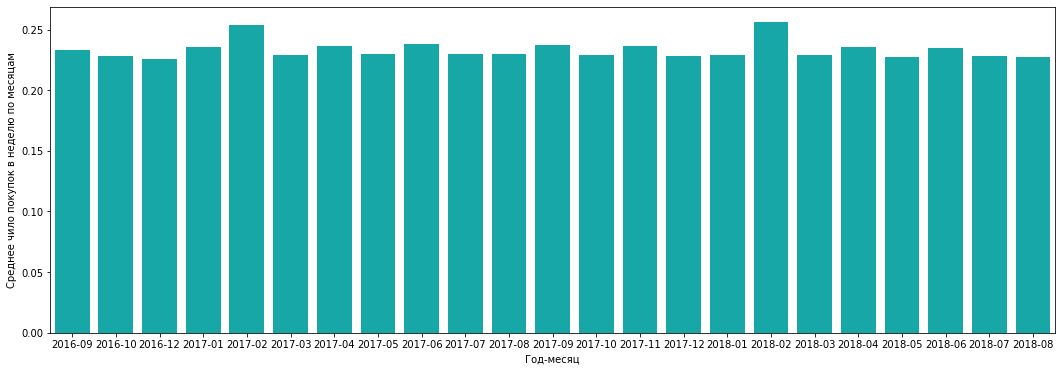

In [251]:
plt.figure(figsize = (18, 6))
ax = sns.barplot(data = df4_visual, x = 'Y-m', y = 'avg_week_purchase', color = 'c')
ax.set_xlabel('Год-месяц')
ax.set_ylabel('Среднее чило покупок в неделю по месяцам')

Как мы видим при рассмотрении всей выборки средние значения покупок в неделю не отличаются из-за подавляющего большинства людей, покупающих что-то только один раз. Попробуем построить график, исключающих категорию покупателей, делающих только одну покупку в месяц.

In [286]:
df4_visual2 

,Y-m,avg_week_purchase
0,2016-10,0.451613
1,2017-01,0.539972
2,2017-02,0.537500
3,2017-03,0.457716
4,2017-04,0.493590
5,2017-05,0.455034
6,2017-06,0.470690
7,2017-07,0.458254
8,2017-08,0.470172
9,2017-09,0.481481


Text(0, 0.5, 'Среднее чило покупок в неделю по месяцам')

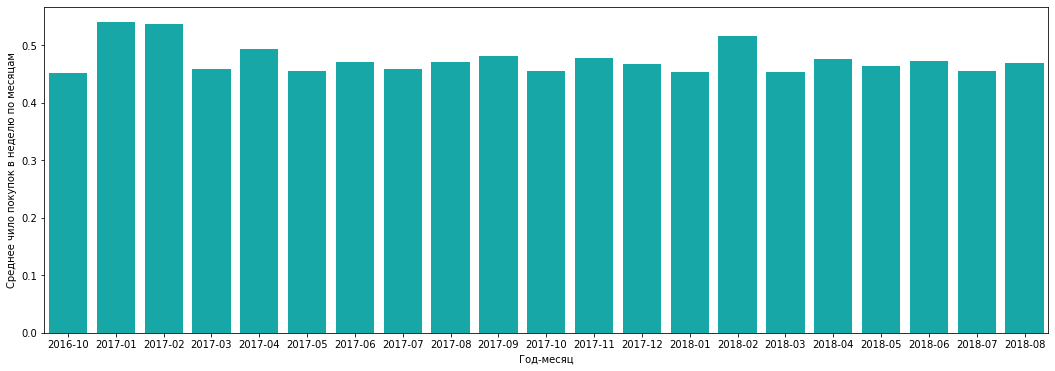

In [287]:
plt.figure(figsize = (18, 6))
df4_visual2 = df4.query('count_purch > 1').groupby('Y-m', as_index = False).agg({'avg_week_purchase': 'mean'}).sort_values('Y-m')
ax = sns.barplot(data = df4_visual2, x = 'Y-m', y = 'avg_week_purchase', color = 'c')
ax.set_xlabel('Год-месяц')
ax.set_ylabel('Среднее чило покупок в неделю по месяцам')

Равномерность данного графика показывает, что если человек не покупает один товар в месяц, то он в большинстве случаев покупает два и не более того. 

**Еще один вид представления**

Является менее удачным в данном конкретном случае, так как большинство клиентов магазина пользуются им лишь раз. Однако, в общем случае данный подход к репрезентации результатов считается более наглядным

In [288]:
df4_1 = df4.pivot(index = ['customer_unique_id', 'Year'], \
         columns = 'month', values = 'avg_week_purchase').fillna(int(0))
df4_1 = df4_1.reset_index()
df4_1 = df4_1.sort_values('Year')
df4_1.head(10).style.hide_index()

customer_unique_id,Year,1,2,3,4,5,6,7,8,9,10,11,12
32ea3bdedab835c3aa6cb68ce66565ef,2016,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.225806,0.000000,0.000000
de51ac050e580a6f05fdf0d56fac2cef,2016,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.225806,0.000000,0.000000
257c88e7a3ace7aa1a5eb5677f86b5b0,2016,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.225806,0.000000,0.000000
a9530b74fe56ca4be9e5f2c7e7c4175a,2016,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.225806,0.000000,0.000000
f79fe58e24e35fe4c036e1fb462769de,2016,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.225806,0.000000,0.000000
381411bd0b3e1aff0b23bfed26d000af,2016,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.225806,0.000000,0.000000
75b181fe0ef694c753c72540c0fdd389,2016,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.225806,0.000000,0.000000
4910006053f92928b62910d568d4ad1e,2016,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.225806,0.000000,0.000000
33fbcb38d3009eddfe53b3063c642959,2016,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.225806,0.000000,0.000000
5da3ad487547da6f4f3011269b38f324,2016,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.225806,0.000000,0.000000


## 5. Используя pandas, проведи когортный анализ пользователей. В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц

*Поскольку в задании не уточняется какой именно год нужно проанализировать, произвольным образом возьмем данные за 2017 год.*

In [255]:
df5 = df.copy()
#df5['month'] = df5.order_purchase_timestamp.dt.month
df5['year'] = df5['order_purchase_timestamp'].dt.year
df5_2017 = df5.query("year == 2017")
df5_2017.head()

,order_id,customer_id,customer_unique_id,order_status,order_approved_at,order_purchase_timestamp,year
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 11:07:15,2017-10-02 10:56:33,2017
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,7c142cf63193a1473d2e66489a9ae977,delivered,2017-11-18 19:45:59,2017-11-18 19:28:06,2017
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,80bb27c7c16e8f973207a5086ab329e2,delivered,2017-07-09 22:10:13,2017-07-09 21:57:05,2017
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,932afa1e708222e5821dac9cd5db4cae,delivered,2017-05-16 13:22:11,2017-05-16 13:10:30,2017
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,39382392765b6dc74812866ee5ee92a7,delivered,2017-01-25 02:50:47,2017-01-23 18:29:09,2017


Каждому из клиентов присвоим дату первого заказа для последующего формирования когорт:

In [256]:
cohort_group1 = df5_2017.groupby('customer_unique_id', as_index = False).agg({'order_purchase_timestamp': 'min'})
cohort_group1

,customer_unique_id,order_purchase_timestamp
0,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03
1,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41
2,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42
3,0005e1862207bf6ccc02e4228effd9a0,2017-03-04 23:32:12
4,0006fdc98a402fceb4eb0ee528f6a8d4,2017-07-18 09:23:10
...,...,...
42118,fffbf87b7a1a6fa8b03f081c5f51a201,2017-12-27 22:36:41
42119,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36
42120,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56
42121,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16


Присоединяем получившуюся таблицу так, чтобы каждому заказу соответстовал первый заказ клиента, и считаем, спустя сколько времени после первого заказа он совершил последующие заказы (в колонке *retention*)

In [257]:
df5_2017_cohort = df5_2017.merge(cohort_group1, on='customer_unique_id', how = 'left')

df5_2017_cohort
df5_2017_cohort['order_purchase_timestamp_y'] = df5_2017_cohort.order_purchase_timestamp_y.dt.month
df5_2017_cohort['order_purchase_timestamp_x'] = df5_2017_cohort.order_purchase_timestamp_x.dt.month
df5_2017_cohort = df5_2017_cohort.rename(columns = {'order_purchase_timestamp_y': 'first_month', \
                                        'order_purchase_timestamp_x': 'month'})
df5_2017_cohort
df5_2017_cohort['retention'] = df5_2017_cohort.month - df5_2017_cohort.first_month
df5_2017_cohort

,order_id,customer_id,customer_unique_id,order_status,order_approved_at,month,year,first_month,retention
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 11:07:15,10,2017,9,1
1,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,7c142cf63193a1473d2e66489a9ae977,delivered,2017-11-18 19:45:59,11,2017,11,0
2,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,80bb27c7c16e8f973207a5086ab329e2,delivered,2017-07-09 22:10:13,7,2017,7,0
3,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,932afa1e708222e5821dac9cd5db4cae,delivered,2017-05-16 13:22:11,5,2017,5,0
4,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,39382392765b6dc74812866ee5ee92a7,delivered,2017-01-25 02:50:47,1,2017,1,0
...,...,...,...,...,...,...,...,...,...
43409,9115830be804184b91f5c00f6f49f92d,da2124f134f5dfbce9d06f29bdb6c308,c716cf2b5b86fb24257cffe9e7969df8,delivered,2017-10-04 20:07:14,10,2017,10,0
43410,aa04ef5214580b06b10e2a378300db44,f01a6bfcc730456317e4081fe0c9940e,e03dbdf5e56c96b106d8115ac336f47f,delivered,2017-01-27 01:05:25,1,2017,1,0
43411,880675dff2150932f1601e1c07eadeeb,47cd45a6ac7b9fb16537df2ccffeb5ac,831ce3f1bacbd424fc4e38fbd4d66d29,delivered,2017-02-23 09:15:11,2,2017,2,0
43412,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,6359f309b166b0196dbf7ad2ac62bb5a,delivered,2017-03-09 09:54:05,3,2017,3,0


Оставляем только те строки, в которых *retention* == 3 и группируем по первому месяцу. То есть в получившейся таблице для каждого из месяцев, когда пользователи совершили свою первую покупку будет выведено количество пользователей вернувшихся спустя три месяца.

In [258]:
df5_2017_cohort_result = df5_2017_cohort.query('retention == 3').groupby('first_month') \
                        .agg({'customer_unique_id': 'nunique'}).rename(columns = {'customer_unique_id': 'retention'}) \
                        .reset_index()

df5_2017_cohort_result

,first_month,retention
0,1,1
1,2,2
2,3,10
3,4,4
4,5,10
5,6,13
6,7,9
7,8,11
8,9,11


В данном фрагменте кода считаем, сколько пользователей всего в первый раз купили что-либо в магазине в каждый из месяцев

In [259]:
df5_2017_cohort_count = df5_2017_cohort.query("retention == 0").groupby('first_month') \
                        .agg({'customer_unique_id': 'nunique'}).rename(columns = {'customer_unique_id': \
                        'count'}).reset_index()
df5_2017_cohort_count

,first_month,count
0,1,716
1,2,1616
2,3,2503
3,4,2257
4,5,3451
5,6,3037
6,7,3753
7,8,4057
8,9,4005
9,10,4329


Теперь объединим эти результаты и посмотрим на *retention_rate* на 3-й месяц

In [260]:
df5_2017_retention = df5_2017_cohort_count.merge(df5_2017_cohort_result, \
                     on = 'first_month', how = 'right')
df5_2017_retention['retention_rate'] = df5_2017_retention['retention'] / df5_2017_retention['count']* 100

df5_2017_retention

,first_month,count,retention,retention_rate
0,1,716,1,0.139665
1,2,1616,2,0.123762
2,3,2503,10,0.399521
3,4,2257,4,0.177226
4,5,3451,10,0.289771
5,6,3037,13,0.428054
6,7,3753,9,0.239808
7,8,4057,11,0.271136
8,9,4005,11,0.274657


В таблице ниже представлены значения retention_rate с января по сентябрь 2017 года

In [261]:
df5_2017_retention['first_month'] = pd.to_datetime(df5_2017_retention['first_month'], \
                                    format = '%m').dt.month_name()
df5_2017_retention

,first_month,count,retention,retention_rate
0,January,716,1,0.139665
1,February,1616,2,0.123762
2,March,2503,10,0.399521
3,April,2257,4,0.177226
4,May,3451,10,0.289771
5,June,3037,13,0.428054
6,July,3753,9,0.239808
7,August,4057,11,0.271136
8,September,4005,11,0.274657


### Решим более сложную задачу. Вычислим retention_rate для каждого из месяцев, представленных в датафрейме, не ограничиваясь одним годом.

Первый шаг в решении этой задачи – перевод месяцев разных годов в единую шкалу. Отсчет начинается с 10 месяца 2016 года, далее идет 11 и 12, а 13 является первым месяцем 2017 года. Финальное преобразование представлено в столбце **relative_month**

In [262]:
df5_1 = df5.copy()
df5_1['month'] = df5_1.order_purchase_timestamp.dt.month

In [263]:
df5_1['relative_month'] = df5_1.apply(lambda x: x['month'] if x['year'] == 2016 else \
                                  (x['year'] - 2016) * 12 + x['month'] , axis=1)
df5_1

,order_id,customer_id,customer_unique_id,order_status,order_approved_at,order_purchase_timestamp,year,month,relative_month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 11:07:15,2017-10-02 10:56:33,2017,10,22
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,af07308b275d755c9edb36a90c618231,delivered,2018-07-26 03:24:27,2018-07-24 20:41:37,2018,7,31
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,3a653a41f6f9fc3d2a113cf8398680e8,delivered,2018-08-08 08:55:23,2018-08-08 08:38:49,2018,8,32
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,7c142cf63193a1473d2e66489a9ae977,delivered,2017-11-18 19:45:59,2017-11-18 19:28:06,2017,11,23
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,72632f0f9dd73dfee390c9b22eb56dd6,delivered,2018-02-13 22:20:29,2018-02-13 21:18:39,2018,2,26
...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,6359f309b166b0196dbf7ad2ac62bb5a,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017,3,15
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,da62f9e57a76d978d02ab5362c509660,delivered,2018-02-06 13:10:37,2018-02-06 12:58:58,2018,2,26
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,737520a9aad80b3fbbdad19b66b37b30,delivered,2017-08-27 15:04:16,2017-08-27 14:46:43,2017,8,20
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,5097a5312c8b157bb7be58ae360ef43c,delivered,2018-01-08 21:36:21,2018-01-08 21:28:27,2018,1,25


Представленные в следующей ячейке кода шаги аналогичны проделанным в решении исходной задачи

In [264]:
cohort_group = df5_1.groupby('customer_unique_id', as_index = False).agg({'relative_month': 'min'})
cohort_group

df5_cohort = df5_1.merge(cohort_group, on='customer_unique_id', how = 'inner')
df5_cohort = df5_cohort.rename(columns = {'relative_month_x': 'relative_month', 'relative_month_y': 'first_month'})
df5_cohort['retention'] = df5_cohort.relative_month - df5_cohort.first_month
df5_cohort_result = df5_cohort.query('retention == 3').groupby('first_month') \
                         .agg({'customer_unique_id': 'nunique'}).reset_index()


df5_cohort_count = df5_cohort.query('retention == 0')[['customer_unique_id', 'first_month', 'retention']] \
                  .drop_duplicates(subset=['customer_unique_id', 'first_month']) \
                  .groupby('first_month').agg({'customer_unique_id': 'count'})

# альтернативный вариант
# df5_cohort.query('retention == 0') \
#           .groupby('first_month').agg({'customer_unique_id': 'nunique'})

df5_cohort_count
df5_retention = df5_cohort_count.merge(df5_cohort_result, on = 'first_month', \
                                                   how = 'inner')
df5_retention
df5_retention = df5_retention.rename(columns = {'customer_unique_id_x': 'count', 'customer_unique_id_y': 'retention'})
df5_retention['retention_rate'] = df5_retention['retention'] / df5_retention['count']* 100
df5_retention

,first_month,count,retention,retention_rate
0,13,715,1,0.139860
1,14,1616,2,0.123762
2,15,2503,10,0.399521
3,16,2256,4,0.177305
4,17,3451,10,0.289771
5,18,3037,13,0.428054
6,19,3752,9,0.239872
7,20,4057,11,0.271136
8,21,4004,11,0.274725
9,22,4329,4,0.092400


Теперь переведем вспомогательные значения месяцев обратно в привычные для большей наглядности получившихся результатов

Финальное представления таблицы **retention_rate**

In [265]:
df5_retention['year'] = df5_retention.apply(lambda x: 2017 if x['first_month'] < 25 else \
                                  2018, axis=1)
df5_retention['month'] = df5_retention['first_month'].apply(lambda x: pd.to_datetime(str(x % 12) \
                         if x % 12 != 0 else '12', format='%m')).dt.strftime('%m')
df5_retention['Y-m'] = pd.to_datetime(df5_retention['year'].astype(str) + ' ' + df5_retention['month'].astype(str), \
                                     format = '%Y-%m').dt.to_period('M')

df5_retention['month'] = pd.to_datetime(df5_retention['month'], format = '%m').dt.month_name()

df5_retention1 = df5_retention[['year', 'month', 'count', 'retention', 'retention_rate']]
# df5_retention
df5_retention1

,year,month,count,retention,retention_rate
0,2017,January,715,1,0.139860
1,2017,February,1616,2,0.123762
2,2017,March,2503,10,0.399521
3,2017,April,2256,4,0.177305
4,2017,May,3451,10,0.289771
5,2017,June,3037,13,0.428054
6,2017,July,3752,9,0.239872
7,2017,August,4057,11,0.271136
8,2017,September,4004,11,0.274725
9,2017,October,4329,4,0.092400


## График retention_rate по месяцам

Text(0, 0.5, 'Процент людей вернувшихся спустя три месяца')

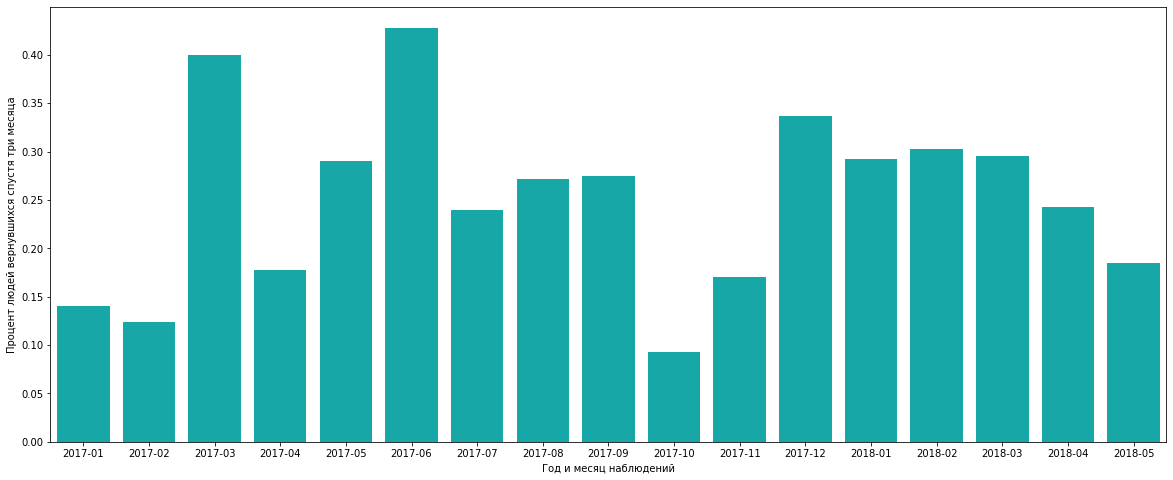

In [266]:
plt.figure(figsize = (20, 8))
ax = sns.barplot(data = df5_retention, x = 'Y-m', y = 'retention_rate', color = 'c')
ax.set_xlabel('Год и месяц наблюдений')
ax.set_ylabel('Процент людей вернувшихся спустя три месяца')

## 6. Построить RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию. R - время от последней покупки пользователя до текущей даты, F - суммарное количество покупок у пользователя за всё время, M - сумма покупок за всё время. Подробно опиши, как ты создавал кластеры. Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров.

Таблица **order_items** не содержит информации о количестве купленного товара.
Однако приведенный ниже код помогает сделать вывод о том, что в таблице есть строчки с 
совпадающими *order_id*, *product_id* и *shipping_limit_date*. Такие строчки относятся к одинаковым товарам, добавленным в одно время и таким образом заменяет столбец с количеством

In [267]:
order_items.loc[order_items.duplicated(subset = ['order_id', 'product_id', 'shipping_limit_date'])]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
14,0008288aa423d2a3f00fcb17cd7d8719,2,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,2018-02-21 02:55:52,49.90,13.37
33,00143d0f86d6fbd9f9b38ab440ac16f5,2,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10
34,00143d0f86d6fbd9f9b38ab440ac16f5,3,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10
43,001ab0a7578dd66cd4b0a71f5b6e1e41,2,0b0172eb0fd18479d29c3bc122c058c2,5656537e588803a555b8eb41f07a944b,2018-01-04 02:33:42,24.89,17.63
44,001ab0a7578dd66cd4b0a71f5b6e1e41,3,0b0172eb0fd18479d29c3bc122c058c2,5656537e588803a555b8eb41f07a944b,2018-01-04 02:33:42,24.89,17.63
...,...,...,...,...,...,...,...
112617,ffecd5a79a0084f6a592288c67e3c298,3,50fd2b788dc166edd20512370dac54df,8b321bb669392f5163d04c59e235e066,2018-03-05 20:15:27,21.90,15.79
112635,fff8287bbae429a99bb7e8c21d151c41,2,bee2e070c39f3dd2f6883a17a5f0da45,4e922959ae960d389249c378d1c939f5,2018-03-27 12:29:22,180.00,48.14
112641,fffb9224b6fc7c43ebb0904318b10b5f,2,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19
112642,fffb9224b6fc7c43ebb0904318b10b5f,3,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19


Возьмем таблицу, содержащую информацию о покупках и месяцах из 5 задания и соединим ее с таблицей **order_items**

In [268]:
df6 = df5.copy()

In [269]:
df6 = df5.copy()
df6_rfm = df6.merge(order_items, on = 'order_id', how = 'inner')
# df6_with_items.dropna()
df6_rfm = df6_rfm[['order_id', 'customer_id', 'customer_unique_id', \
                                 'order_approved_at', 'order_purchase_timestamp', 'product_id', 'price']]
df6_rfm

,order_id,customer_id,customer_unique_id,order_approved_at,order_purchase_timestamp,product_id,price
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 11:07:15,2017-10-02 10:56:33,87285b34884572647811a353c7ac498a,29.99
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,af07308b275d755c9edb36a90c618231,2018-07-26 03:24:27,2018-07-24 20:41:37,595fac2a385ac33a80bd5114aec74eb8,118.70
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,3a653a41f6f9fc3d2a113cf8398680e8,2018-08-08 08:55:23,2018-08-08 08:38:49,aa4383b373c6aca5d8797843e5594415,159.90
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,7c142cf63193a1473d2e66489a9ae977,2017-11-18 19:45:59,2017-11-18 19:28:06,d0b61bfb1de832b15ba9d266ca96e5b0,45.00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,72632f0f9dd73dfee390c9b22eb56dd6,2018-02-13 22:20:29,2018-02-13 21:18:39,65266b2da20d04dbe00c5c2d3bb7859e,19.90
...,...,...,...,...,...,...,...
110177,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,da62f9e57a76d978d02ab5362c509660,2018-02-06 13:10:37,2018-02-06 12:58:58,f1d4ce8c6dd66c47bbaa8c6781c2a923,174.90
110178,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,737520a9aad80b3fbbdad19b66b37b30,2017-08-27 15:04:16,2017-08-27 14:46:43,b80910977a37536adeddd63663f916ad,205.99
110179,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,5097a5312c8b157bb7be58ae360ef43c,2018-01-08 21:36:21,2018-01-08 21:28:27,d1c427060a0f73f6b889a5c7c61f2ac4,179.99
110180,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,5097a5312c8b157bb7be58ae360ef43c,2018-01-08 21:36:21,2018-01-08 21:28:27,d1c427060a0f73f6b889a5c7c61f2ac4,179.99


Поскольку проект является учебным и данные относятся к периоду 5-летней давности 
для реалистичности будем считать, что сейчас *3 октября 2018 года*. Полагаю, это привнесет наглядность в дальнейший анализ. Ниже приведен код, подтверждающий, что наблюдений после 3 октября в исходном датасете не наблюдается 

In [270]:
orders.query('order_approved_at >= "2018-10-03"')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date


Для простоты будем понимать время от последней покупки до текущей даты как количество полных дней между от создания заказа до сегодняшнего дня

In [271]:
df6_rfm['today'] = pd.to_datetime('2018-10-03', format = '%Y-%m-%d')
df6_rfm['order_purchase_timestamp'] = pd.to_datetime(df6_rfm.order_approved_at, format = '%Y-%m-%d')
df6
df6_rfm['R'] = (df6_rfm.today - df6_rfm.order_purchase_timestamp)
df6_rfm['R'] = df6_rfm['R'].dt.days
df6_rfm

,order_id,customer_id,customer_unique_id,order_approved_at,order_purchase_timestamp,product_id,price,today,R
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 11:07:15,2017-10-02 11:07:15,87285b34884572647811a353c7ac498a,29.99,2018-10-03,365
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,af07308b275d755c9edb36a90c618231,2018-07-26 03:24:27,2018-07-26 03:24:27,595fac2a385ac33a80bd5114aec74eb8,118.70,2018-10-03,68
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,3a653a41f6f9fc3d2a113cf8398680e8,2018-08-08 08:55:23,2018-08-08 08:55:23,aa4383b373c6aca5d8797843e5594415,159.90,2018-10-03,55
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,7c142cf63193a1473d2e66489a9ae977,2017-11-18 19:45:59,2017-11-18 19:45:59,d0b61bfb1de832b15ba9d266ca96e5b0,45.00,2018-10-03,318
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,72632f0f9dd73dfee390c9b22eb56dd6,2018-02-13 22:20:29,2018-02-13 22:20:29,65266b2da20d04dbe00c5c2d3bb7859e,19.90,2018-10-03,231
...,...,...,...,...,...,...,...,...,...
110177,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,da62f9e57a76d978d02ab5362c509660,2018-02-06 13:10:37,2018-02-06 13:10:37,f1d4ce8c6dd66c47bbaa8c6781c2a923,174.90,2018-10-03,238
110178,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,737520a9aad80b3fbbdad19b66b37b30,2017-08-27 15:04:16,2017-08-27 15:04:16,b80910977a37536adeddd63663f916ad,205.99,2018-10-03,401
110179,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,5097a5312c8b157bb7be58ae360ef43c,2018-01-08 21:36:21,2018-01-08 21:36:21,d1c427060a0f73f6b889a5c7c61f2ac4,179.99,2018-10-03,267
110180,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,5097a5312c8b157bb7be58ae360ef43c,2018-01-08 21:36:21,2018-01-08 21:36:21,d1c427060a0f73f6b889a5c7c61f2ac4,179.99,2018-10-03,267


**Считаем R как значение с минимальным количеством дней от покупки до текущей даты, F – общее количество покупок за все время, M – объем средств потраченных в магазине (также за все время)**

In [272]:
df6_rfm = df6_rfm.groupby('customer_unique_id', as_index = False) \
          .agg({'R': 'min', 'order_id': 'nunique', 'price': 'sum'}) \
          .rename(columns = {'order_id': 'F', 'price': 'M'})
df6_rfm

,customer_unique_id,R,F,M
0,0000366f3b9a7992bf8c76cfdf3221e2,145,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,148,1,18.90
2,0000f46a3911fa3c0805444483337064,571,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,355,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,322,1,180.00
...,...,...,...,...
93340,fffcf5a5ff07b0908bd4e2dbc735a684,481,1,1570.00
93341,fffea47cd6d3cc0a88bd621562a9d061,296,1,64.89
93342,ffff371b4d645b6ecea244b27531430a,602,1,89.90
93343,ffff5962728ec6157033ef9805bacc48,153,1,115.00


**Визуализация распределения величины R:**

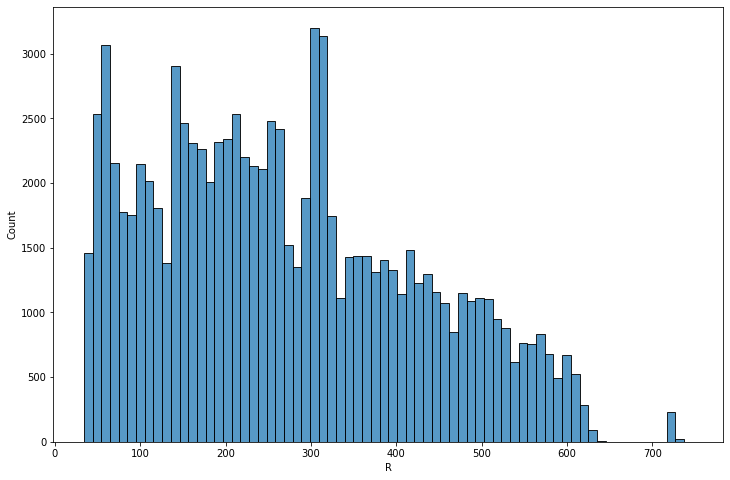

In [273]:
plt.figure(figsize = (12, 8))
sns.histplot(df6_rfm.R)

**Визуализация распределения величины M:**

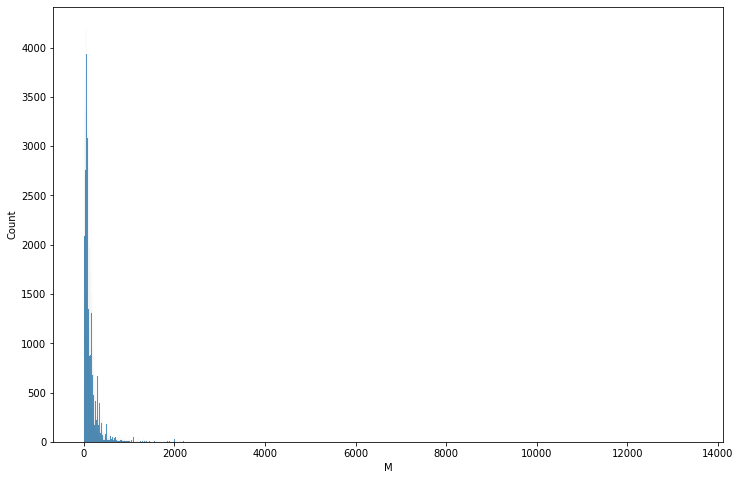

In [274]:
plt.figure(figsize = (12, 8))
sns.histplot(df6_rfm.M)

**Визуализация распределения величины F:**

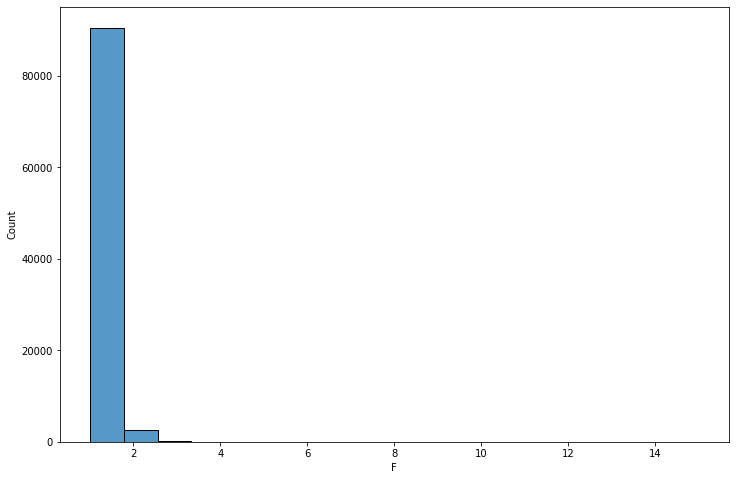

In [275]:
plt.figure(figsize = (12, 8))
sns.histplot(df6_rfm.F)

Анализируя перцентили можно прийти к выводу, что R и M могут быть успешно разбиты на кластеры исходя из своего положения относительно квантилей

In [276]:
quintiles = df6_rfm[['R', 'F', 'M']].quantile([.33, .66]).to_dict()
quintiles

{'R': {0.33: 180.0, 0.66: 319.0},
 'F': {0.33: 1.0, 0.66: 1.0},
 'M': {0.33: 57.9, 0.66: 124.9}}

Чем выше категория, тем лучше. Именно поэтому для r_score и m_score используются разные функции. Первая метрика определяет в высшую категорию недавно активных пользователей, в то время как вторая поощряеят пользователей оставивших наибольшее количество денег в магазине

In [277]:
def r_score(x):
    if x <= quintiles['R'][.33]:
        return 3
    elif x <= quintiles['R'][.66]:
        return 2
    else:
        return 1

def m_score(x):
    if x <= quintiles['M'][.33]:
        return 1
    elif x <= quintiles['M'][.66]:
        return 2
    else:
        return 3


df6_rfm['R_Score'] = df6_rfm['R'].apply(lambda x: r_score(x))
df6_rfm['M_Score'] = df6_rfm['M'].apply(lambda x: m_score(x))

Абсолютное большинство наблюдений величины F равняется единице. Разбитие на кластеры в данном случае имеет смысл в контексте отделения пользователей, совершивших покупку лишь один раз от пользователей, которые неоднократно пользовались услугами магазина.

In [278]:
def f_score(x):
    if x == 1:
        return 1
    else:
        return 2

df6_rfm['F_Score'] = df6_rfm['F'].apply(lambda x: f_score(x))

In [279]:
df6_rfm

,customer_unique_id,R,F,M,R_Score,M_Score,F_Score
0,0000366f3b9a7992bf8c76cfdf3221e2,145,1,129.90,3,3,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,148,1,18.90,3,1,1
2,0000f46a3911fa3c0805444483337064,571,1,69.00,1,2,1
3,0000f6ccb0745a6a4b88665a16c9f078,355,1,25.99,1,1,1
4,0004aac84e0df4da2b147fca70cf8255,322,1,180.00,1,3,1
...,...,...,...,...,...,...,...
93340,fffcf5a5ff07b0908bd4e2dbc735a684,481,1,1570.00,1,3,1
93341,fffea47cd6d3cc0a88bd621562a9d061,296,1,64.89,2,2,1
93342,ffff371b4d645b6ecea244b27531430a,602,1,89.90,1,2,1
93343,ffff5962728ec6157033ef9805bacc48,153,1,115.00,3,2,1


Выведем топ RFM-сегментов 

In [280]:
df6_rfm_top = df6_rfm.groupby(['R_Score', 'F_Score', 'M_Score'], as_index = False) \
              .agg({'customer_unique_id': 'count'}).rename(columns = \
              {'customer_unique_id': 'count'}).sort_values('count', ascending = False).reset_index()
df6_rfm_top = df6_rfm_top[['R_Score', 'F_Score', 'M_Score', 'count']]
df6_rfm_top

,R_Score,F_Score,M_Score,count
0,1,1,2,10527
1,2,1,1,10377
2,1,1,1,10323
3,3,1,2,10009
4,1,1,3,9996
5,3,1,1,9923
6,2,1,3,9869
7,3,1,3,9860
8,2,1,2,9661
9,3,2,3,717


**Приведем описание каждого из RFM-cегментов в порядке убывания:**

In [281]:
R_Score = df6_rfm_top['R_Score']
F_Score = df6_rfm_top['F_Score']

M_Score = df6_rfm_top['M_Score']
R_Borders = [df6_rfm['R'].max(), quintiles['R'][.66], quintiles['R'][.33], df6_rfm['R'].min()]
F_Borders = ['1', 'больше чем 1']
M_Borders = [df6_rfm['M'].min(), quintiles['M'][.33], quintiles['M'][.66], df6_rfm['M'].max()]
for i in range(df6_rfm_top.shape[0]):
    print("""RFM-сегмент {RS}{FS}{MS} (recency={RS}, frequency={FS}, monetary={MS}) имеет границы метрик: 
1. recency: oт {R_lb} до {R_rb} дней
2. frequency: {FB} заказ за все время
3. monetary: от {M_lb} до {M_rb} у.е.""" \
.format(RS = R_Score[i], FS = F_Score[i], MS = M_Score[i], R_lb = R_Borders[R_Score[i]], \
R_rb = R_Borders[R_Score[i]-1], FB = F_Borders[F_Score[i]-1], M_lb = M_Borders[M_Score[i]-1], \
M_rb = M_Borders[M_Score[i]]))
    print('Чиленность данного сегмента: {} \n'.format(df6_rfm_top['count'][i]) )


RFM-сегмент 112 (recency=1, frequency=1, monetary=2) имеет границы метрик: 
1. recency: oт 319.0 до 747 дней
2. frequency: 1 заказ за все время
3. monetary: от 57.9 до 124.9 у.е.
Чиленность данного сегмента: 10527 

RFM-сегмент 211 (recency=2, frequency=1, monetary=1) имеет границы метрик: 
1. recency: oт 180.0 до 319.0 дней
2. frequency: 1 заказ за все время
3. monetary: от 0.85 до 57.9 у.е.
Чиленность данного сегмента: 10377 

RFM-сегмент 111 (recency=1, frequency=1, monetary=1) имеет границы метрик: 
1. recency: oт 319.0 до 747 дней
2. frequency: 1 заказ за все время
3. monetary: от 0.85 до 57.9 у.е.
Чиленность данного сегмента: 10323 

RFM-сегмент 312 (recency=3, frequency=1, monetary=2) имеет границы метрик: 
1. recency: oт 34 до 180.0 дней
2. frequency: 1 заказ за все время
3. monetary: от 57.9 до 124.9 у.е.
Чиленность данного сегмента: 10009 

RFM-сегмент 113 (recency=1, frequency=1, monetary=3) имеет границы метрик: 
1. recency: oт 319.0 до 747 дней
2. frequency: 1 заказ за все

Итак, наиболее многочисленными с огромным отрывом являются RFM-сегменты с frequency = 1, поскольку большая часть уникальных пользователей совершала в магазине лишь одну покупку (см. пункт 1). 
Для данного блока сегментов (где f=1) значения распределены достаточно равномерно. Однако лидирующим является сегмент 112 с пользователями потратившими от 57.99 до 125.0 (среднюю цену на товар) и при том сделавших это давно (от 320 до 747 дней назад). Самым малочисленным является сегмент 212. Пользователей из него можно условно описать как также потративших среднее количество средств, но сделавших это сравнительно недавно (от 181.0 до 320 дней назад).

Отдельного рассмотрения заслуживает блок с людьми совершившими больше чем одну покупку в магазине. Он является гораздо менее многочисленным, но в силу того, что значения в нем в отличии от предыдущего блока распределены неравномерно, представляет больший интерес для дальнейшего анализа. Внутри данного блока мы можем выделить три подблока:

- Первый подблок представляет пользователей неоднократно оставивших в магазине большое количество средств (от 125 до 13440 у.е.). При этом дата последней покупки варьируется от 29 до 747 дней (то есть включается все R-сегменты). Является самым многочисленным.
- Второй подблок  представляет пользователей неоднократно оставивших в магазине среднее количество средств (от 57.99 до 125.0 у.е.). При этом дата последней покупки варьируется от 29 до 747 дней (то есть включается все R-сегменты). Является средним по численности.
- Третий подблок  представляет пользователей неоднократно оставивших в магазине малое количество средств (0.85 до 57.99 у.е.). При этом дата последней покупки варьируется от 29 до 747 дней (то есть включается все R-сегменты). Является наименьшим по численности.

Таким образом, в рамках блока с людьми, совершивишими более одной покупки в магазине отмечается тенденция: покупатели, воспользовавшися услугами магазина больше одного раза, приносят ему высокую суммарную прибыль.

**Отобразим эту закономерность на графике:**

Text(0.5, 1.0, 'Пользователи с больше чем 1 покупкой')

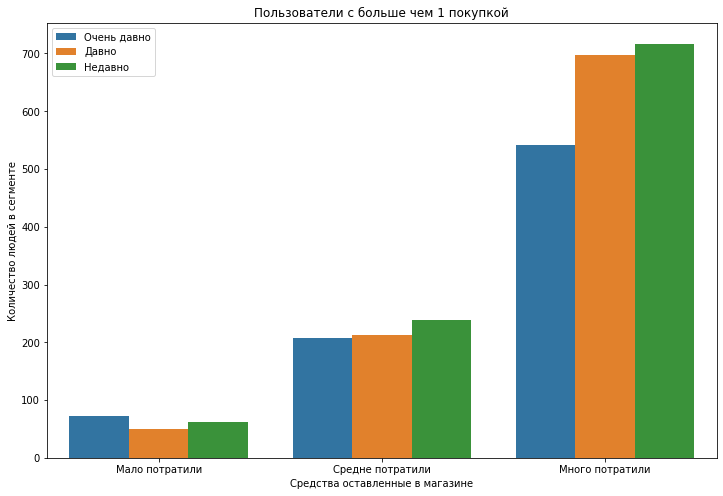

In [282]:
plt.figure(figsize = (12, 8))
ax = sns.barplot(data = df6_rfm_top.query('F_Score == 2'), x = 'M_Score',  \
             y = 'count', hue = 'R_Score')
# new_legend_labels = ['Очень давно', 'Давно', 'Недавно']
new_legend_labels = ['Очень давно', 'Давно', 'Недавно']
handles, _ = ax.get_legend_handles_labels()  # Получение текущих значений легенды
ax.legend(handles, new_legend_labels)  # Настройка легенды

ax.set_xlabel('Средства оставленные в магазине')
ax.set_ylabel('Количество людей в сегменте')
new_x_labels = ['Мало потратили', 'Средне потратили', 'Много потратили']
plt.xticks(range(len(new_x_labels)), new_x_labels)
plt.title("Пользователи с больше чем 1 покупкой")

Как мы видим, среди пользователей совершивших одну покупку в магазине такой тенденции не наблюдается

Text(0.5, 1.0, 'Пользователи с 1 покупкой')

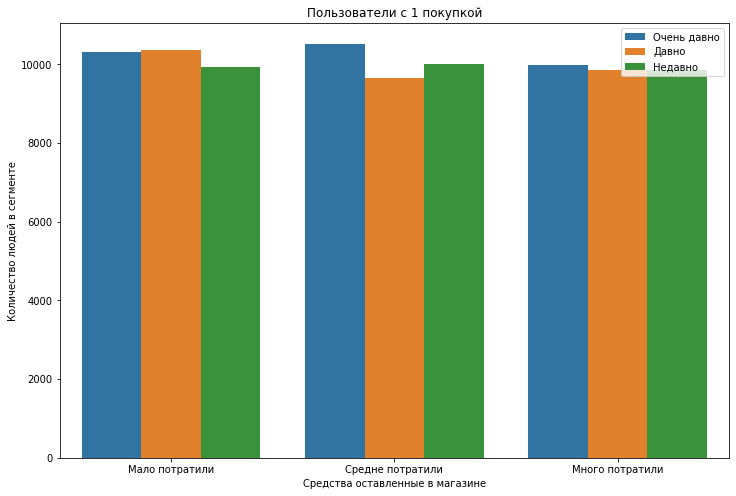

In [283]:
plt.figure(figsize = (12, 8))
ax = sns.barplot(data = df6_rfm_top.query('F_Score == 1'), x = 'M_Score',  \
             y = 'count', hue = 'R_Score')
# new_legend_labels = ['Очень давно', 'Давно', 'Недавно']
new_legend_labels = ['Очень давно', 'Давно', 'Недавно']
handles, _ = ax.get_legend_handles_labels()  # Получение текущих значений легенды
ax.legend(handles, new_legend_labels)  # Настройка легенды

ax.set_xlabel('Средства оставленные в магазине')
ax.set_ylabel('Количество людей в сегменте')
new_x_labels = ['Мало потратили', 'Средне потратили', 'Много потратили']
plt.xticks(range(len(new_x_labels)), new_x_labels)
plt.title("Пользователи с 1 покупкой")